This notebook creates the reference files for the 10ns production runs. Those files are in .json format and contain the directories needed to pull data from mss on peregrine 

This notebook is for D-A co-polymers analysis and is based on streamm v0.3.0.12

Import packages 

In [1]:
# Standard 
import os, sys , copy ,shutil, logging, pandas

In [2]:
# Import all the streamm modules
from streamm import *

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
from IPython.display import Image

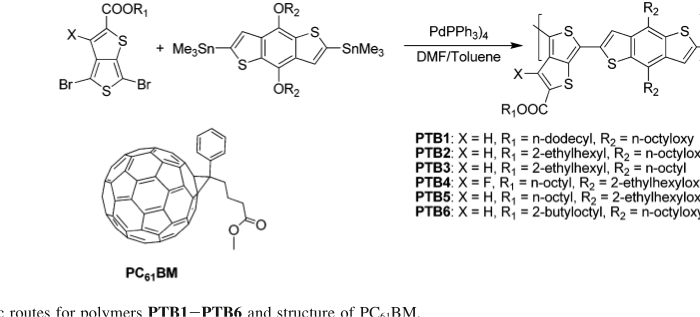

In [5]:
Image(filename='figures/PTBX.png')

In [6]:
res_loc = resource.Resource('local')
res_loc.load_json()

Reading in resource json file res_local.json 


In [7]:
peregrine = resource.Resource('peregrine')
peregrine.load_json()

Reading in resource json file res_peregrine.json 


In [8]:
proj_i = project.Project('DAPpolymers_prod1')

In [20]:
proj_i.set_resource(res_loc)

In [11]:
rep_tags = []
rep_tags.append('D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173')
rep_tags.append('D1_R2R200_A31_R4_n1_R40n1R40n1R42n1__n5_x173')
rep_tags.append('D1_R2R200_A23_R4_n1_R41n1R41n1R41n1__n5_x193')
rep_tags.append('D1_R2R200_A23_R4_n1_R41n1R41n1R40n1__n5_x193')
rep_tags.append('D1_R2R200_A31_R4_n1_R41n1R41n1R40n1__n5_x193')
rep_tags.append('D1_R2R200_A2_R3_R200R200R201_n5_x197')


In [28]:
for rep_tag in rep_tags:
    sim_prod1 = lammps.LAMMPS('%s_prod1'%(rep_tag))
    sim_prod1.files['input']['in'] = 'lmp_prod1.in'
    sim_prod1.files['output']['log'] = 'prod1.log'
    sim_prod1.files['output']['cply'] = '%s.cply'%(rep_tag)
    sim_prod1.files['output']['xyz'] = '%s.xyz'%(rep_tag)
    sim_prod1.files['output']['data_file'] = 'prod1.data'
    sim_prod1.files['data']['dcd'] = 'prod1_dump.dcd'
    sim_prod1.set_resource(peregrine)
    sim_prod1.make_dir()
    file_type='output'
    compressed_file = "%s_%s.%s"%(sim_prod1.tag,file_type,sim_prod1.properties['compress_sufix'] )
    sim_prod1.files[file_type][sim_prod1.properties['comp_key']] = compressed_file
    file_type='data'
    compressed_file = "%s_%s.%s"%(sim_prod1.tag,file_type,sim_prod1.properties['compress_sufix'] )
    sim_prod1.files[file_type][sim_prod1.properties['comp_key']] = compressed_file
    sim_prod1.meta['status'] = 'stored'
    sim_prod1.dump_json()
    proj_i.calculations[sim_prod1.tag] = sim_prod1


    

{'files': {'templates': {}, 'input': {'in': 'lmp_prod1.in'}, 'output': {'cply': 'D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173.cply', 'data_file': 'prod1.data', 'xyz': 'D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173.xyz', 'log': 'prod1.log', 'compressed': 'D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173_prod1_output.tgz'}, 'data': {'dcd': 'prod1_dump.dcd', 'compressed': 'D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173_prod1_data.tgz'}, 'scripts': {}}, 'meta': {'date': '2016-11-14T20:25:21.951550', 'status': 'stored', 'resource': 'peregrine', 'software': 'lammps'}, 'references': {}, 'units': {'distance': 'angstroms', 'energy': 'kcal/mol', 'angle': 'radians', 'time': 'ns'}, 'data': {}, 'properties': {'uncompress': 'tar -xzf ', u'scratch': u'/scratch/tkemper', 'compress': 'tar -czf ', u'ppn': 24, 'finish_str': 'Loop time of', u'allocation': u'orgopv', 'run_list': '', u'nproc': 24, u'pmem': 1500, 'compress_sufix': 'tgz', u'feature': u'24core', u'queue

In [29]:
proj_i.dump_json()

In [30]:
print os.getcwd()

/Users/tkemper/Projects/DApolymers


In [33]:
for calc_key,calc_i in proj_i.calculations.iteritems():
    print calc_key,calc_i.resource.meta['type'] ,calc_i.meta['status']

D1_R2R200_A23_R4_n1_R41n1R41n1R40n1__n5_x193_prod1 ssh stored
D1_R2R200_A31_R4_n1_R40n1R40n1R42n1__n5_x173_prod1 ssh stored
D1_R2R200_A31_R4_n1_R41n1R41n1R40n1__n5_x193_prod1 ssh stored
D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173_prod1 ssh stored
D1_R2R200_A23_R4_n1_R41n1R41n1R41n1__n5_x193_prod1 ssh stored
D1_R2R200_A2_R3_R200R200R201_n5_x197_prod1 ssh stored


In [34]:
proj_i.check()

Calculation D1_R2R200_A23_R4_n1_R41n1R41n1R40n1__n5_x193_prod1 has status stored and will not be checked 
Calculation D1_R2R200_A23_R4_n1_R41n1R41n1R40n1__n5_x193_prod1 has status stored
Calculation D1_R2R200_A31_R4_n1_R40n1R40n1R42n1__n5_x173_prod1 has status stored and will not be checked 
Calculation D1_R2R200_A31_R4_n1_R40n1R40n1R42n1__n5_x173_prod1 has status stored
Calculation D1_R2R200_A31_R4_n1_R41n1R41n1R40n1__n5_x193_prod1 has status stored and will not be checked 
Calculation D1_R2R200_A31_R4_n1_R41n1R41n1R40n1__n5_x193_prod1 has status stored
Calculation D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173_prod1 has status stored and will not be checked 
Calculation D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173_prod1 has status stored
Calculation D1_R2R200_A23_R4_n1_R41n1R41n1R41n1__n5_x193_prod1 has status stored and will not be checked 
Calculation D1_R2R200_A23_R4_n1_R41n1R41n1R41n1__n5_x193_prod1 has status stored
Calculation D1_R2R200_A2_R3_R200R200R201_

In [ ]:
sim_prod1.meta['status'] = 'stored'

In [ ]:
sim_prod1.dump_json()

In [ ]:
os.chdir(sim_prod1.dir['home'])
sim_prod1.dump_json()

In [ ]:
proj_i.calculations[sim_prod1.tag] = sim_prod1

In [ ]:
proj_i.dump_json()

In [ ]:
sim_min1 = lammps.LAMMPS('D1_R2R2A2_R3_R200R200R201_n5_x197_lmpprod1_min1')

In [ ]:
sim_min1.set_resource(peregrine)

In [ ]:
sim_i.properties['scratch'] = sim_i.dir['scratch']

In [ ]:
print sim_i.properties['scratch']

In [ ]:
sim_i.add_refcalc(sim_prod1)

In [ ]:
print sim_i.dir['launch']

In [ ]:
sim_i.make_dir()

In [ ]:
print sim_i.dir['templates']

In [ ]:
file_type = 'templates'
file_key = 'run'
file_name = "lammps_peregrine.pbs"
from_dirkey = 'templates'
to_dirkey = 'launch'
sim_i.cp_file(file_type,file_key,file_name,from_dirkey,to_dirkey)

In [ ]:
file_type = 'templates'
file_key = 'in'
file_name = "lammps_min.in"
from_dirkey = 'templates'
to_dirkey = 'launch'
sim_i.cp_file(file_type,file_key,file_name,from_dirkey,to_dirkey)

In [ ]:
os.chdir(sim_i.dir['launch'])

In [ ]:
sim_i.load_str('templates','in')

In [ ]:
sim_i.load_str('templates','run')

Set data file from reference 

In [ ]:
sim_i.add_file('input','data_file',sim_prod1.files['output']['data_file'])
sim_i.properties['data_file'] = sim_prod1.files['output']['data_file']

In [ ]:
sim_i.replacewrite_prop('in','input','in','%s.in'%(sim_i.tag))

In [ ]:
sim_i.properties['input_in'] = sim_i.files['input']['in']

In [ ]:
sim_i.replacewrite_prop('run','scripts','run','%s.pbs'%(sim_i.tag))

In [ ]:
sim_i.add_file('output','log','%s.log'%(sim_i.tag))

In [ ]:
os.chdir(sim_i.dir['home'])
sim_i.dump_json()

In [ ]:
os.chdir(sim_i.dir['launch'])

In [ ]:
sim_i.push()

In [ ]:
print sim_i.files['scripts']

In [ ]:
sim_i.run()

In [ ]:
sim_i.check()
print sim_i.meta['status']

In [ ]:
sim_i.analysis()

In [ ]:
print sim_i.properties['run_cnt']
run_i = sim_i.properties['run_list'][0]
print run_i.properties['timestep'],run_i.timeseries.keys()
print run_i.timeseries['step']
print run_i.timeseries['toteng'][-1] - run_i.timeseries['toteng'][0]
print run_i.timeseries['poteng'][-1] - run_i.timeseries['poteng'][0]

In [ ]:
print 'input',sim_i.files['input']
print 'scripts',sim_i.files['scripts']
print 'output',sim_i.files['output']
print 'data',sim_i.files['data']

In [ ]:
sim_i.store()

In [ ]:
print os.getcwd()

In [ ]:
os.chdir(sim_i.dir['home'])
sim_i.dump_json()

In [ ]:
calc_molmin1 = calculation.CalculationRes('D1_R2R2A2_R3_R200R200R201_n5_x197_lmpprod1_min1_molmin1')
calc_molmin1.load_json()
print calc_molmin1.meta['status']

In [ ]:
calc_molmin1.set_resource(peregrine)

In [ ]:
calc_molmin1.properties['scratch'] = calc_molmin1.dir['scratch']

In [ ]:
calc_molmin1.add_refcalc(sim_min1)

In [ ]:
calc_molmin1.make_dir()